# Exercice 3 du TP3 : 

#### Dans un tournoi d’échecs, 10 parties sont jouées indépendamment. Chaque partie
#### se termine par une victoire de l’un des joueurs avec une probabilité de 0.4 et par
#### un match nul avec une probabilité de 0.6. Trouvez la probabilité qu’exactement 5
#### parties se terminent par un match nul.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import binom 
import pandas as pd
import random

## Solution analytique : 

## Solution brute force : 

In [3]:
n = 10                  # nbr de parties 
p = 0.6                 # Proba d'avoir un match nul 
N = 100000           # Nbr de tournois simulé 

iter = []               # Tableau pour stocker chaque tournoi 
for _ in range (N) :
    tournoi = []
    for i in range (n) : 
        if random.random() < 0.6 : 
            tournoi.append(1)                       # match nul obtenu = succès de Bernouilly 
        else : 
            tournoi.append(0)                       # match non nul    = Echec de Bernouilly 
    iter.append(tournoi)                            # Ajouter tournoi sur le grand tableau 

# Transformation en DataFrame
df = pd.DataFrame(iter, columns = [f"Partie_{i + 1}" for i in range(n)])
print(df)


       Partie_1  Partie_2  Partie_3  Partie_4  Partie_5  Partie_6  Partie_7  \
0             1         0         1         1         1         1         0   
1             1         1         1         1         1         1         0   
2             0         0         1         0         0         0         1   
3             1         0         1         0         1         1         1   
4             0         1         1         0         1         0         1   
...         ...       ...       ...       ...       ...       ...       ...   
99995         1         0         0         1         0         1         0   
99996         0         1         1         0         0         1         1   
99997         0         0         1         0         1         0         1   
99998         1         0         1         0         0         1         1   
99999         0         0         0         1         1         1         1   

       Partie_8  Partie_9  Partie_10  
0           

In [5]:
df["Matchs nuls"] = df.sum(axis = 1)                # Compter le nbr de matchs nuls en additionnant toutes les colonnes de chaque ligne
print(df)

       Partie_1  Partie_2  Partie_3  Partie_4  Partie_5  Partie_6  Partie_7  \
0             1         0         1         1         1         1         0   
1             1         1         1         1         1         1         0   
2             0         0         1         0         0         0         1   
3             1         0         1         0         1         1         1   
4             0         1         1         0         1         0         1   
...         ...       ...       ...       ...       ...       ...       ...   
99995         1         0         0         1         0         1         0   
99996         0         1         1         0         0         1         1   
99997         0         0         1         0         1         0         1   
99998         1         0         1         0         0         1         1   
99999         0         0         0         1         1         1         1   

       Partie_8  Partie_9  Partie_10  Matchs nuls  

In [6]:
df_5 = df[df["Matchs nuls"] == 5]               # Garder qe les colonnes ou le nbr match nul = 5 
print(df_5)

Empty DataFrame
Columns: [Partie_1, Partie_2, Partie_3, Partie_4, Partie_5, Partie_6, Partie_7, Partie_8, Partie_9, Partie_10, Matchs nuls]
Index: []


In [7]:
print("Le nombre de matchs nuls est : ", len(df_5))
print("La probabilité d'avoir 5 matchs nuls est de : ", (len(df_5) / N) * 100, "%")

Le nombre de matchs nuls est :  0
La probabilité d'avoir 5 matchs nuls est de :  0.0 %


In [8]:
# Fonction entière : qui calcule la probabilité d'avoir 5 matchs nuls dans un tournoi de 10 parties pour N itérations 
def brute_force(N) : 
    n = 10                   
    p = 0.6                            

    iter = []                
    for _ in range (N) :
        tournoi = []
        for i in range (n) : 
            if random.random() < 0.6 : 
                tournoi.append(1)                        
            else : 
                tournoi.append(0)                        
        iter.append(tournoi)                             
                            

    # Transformation en DataFrame
    df = pd.DataFrame(iter, columns = [f"Partie_{i + 1}" for i in range(n)])

    df["Matchs nuls"] = df.sum(axis = 1)                
    df_5 = df[df["Matchs nuls"] == 5]                   

    return ((len(df_5) / N) * 100)


In [9]:
N = 15994
print("La proba d'obtenir 5 matchs nuls après N tournois est de : ", brute_force(N), "%")

La proba d'obtenir 5 matchs nuls après N tournois est de :  20.332624734275353 %


Solution probabiliste


In [14]:
import numpy as np
import pandas as pd

# Initialisation du générateur de nombres aléatoires
SEED = 1234
rng = np.random.default_rng(SEED)

# Fonction simulée 
def probabiliste_fonction(N, n=10, p=0.6, k=5, rng=None):
    """
    Calcule la probabilité (en %) d'obtenir exactement `k` matchs nuls sur `n` parties"""
    if rng is None:
        rng = np.random.default_rng()

    # Génère une matrice (N x n) de 0 ou 1 selon la proba p
    data = rng.binomial(1, p, size=(N, n))

    # Compte les matchs nuls (i.e. les "1") pour chaque tournoi
    nb_matchs_nuls = data.sum(axis=1)

    # Calcule la fréquence des tournois avec exactement k matchs nuls
    frequence = np.mean(nb_matchs_nuls == k)

    return frequence * 100  # en pourcentage


In [11]:
resultat = probabiliste_fonction(N=100000, n=10, p=0.6, k=5, rng=rng)
print(f"Probabilité estimée d'avoir exactement 5 matchs nuls : {resultat:.2f}%")


Probabilité estimée d'avoir exactement 5 matchs nuls : 20.12%


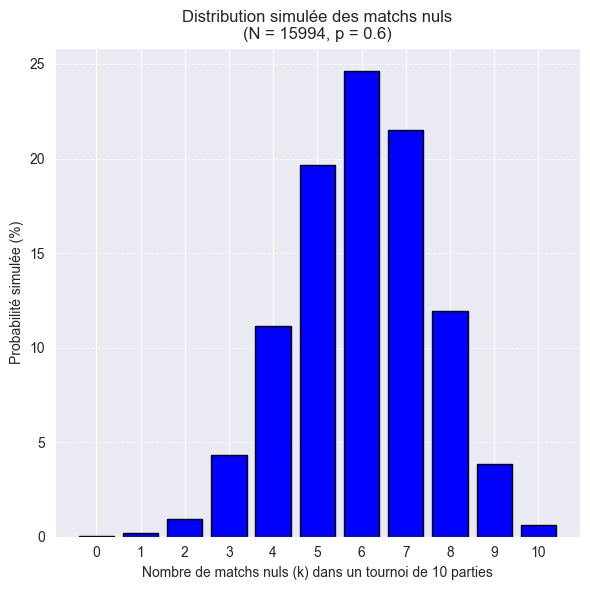

In [16]:
valeurs_possibles_k = list(range(n + 1))
probas = [probabiliste_fonction(N=N, n=n, p=p, k=k, rng=rng) for k in valeurs_possibles_k]
plt.figure(figsize=(6, 6))
plt.bar(valeurs_possibles_k, probas, color='blue', edgecolor='black')
plt.xlabel("Nombre de matchs nuls (k) dans un tournoi de 10 parties")
plt.ylabel("Probabilité simulée (%)")
plt.title(f"Distribution simulée des matchs nuls\n(N = {N}, p = {p})")
plt.xticks(valeurs_possibles_k)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()